In [88]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt, ticker
import scipy.sparse as sp
from sklearn.neighbors import NearestNeighbors
from models.knn import KNN
from datasets.gb import GoodBooks
from repsys import ModelEvaluator

In [2]:
gb = GoodBooks()
gb.load('.repsys_checkpoints/gb/')

In [3]:
knn = KNN()
knn.dataset = gb
knn.fit()

In [4]:
evaluator = ModelEvaluator(
    dataset=gb,
    precision_recall_k=[20, 50],
    ndcg_k=[100],
    coverage_k=[10],
    diversity_k=[10],
    novelty_k=[10],
    coverage_lt_k=[10],
    percentage_lt_k=[10],
)

In [5]:
x = [1, 5, 20, 30, 50, 70, 100, 200, 300, 500, 1000, 5000]

In [ ]:
results = []
for k in x:
    knn.k = k
    knn.fit()
    evaluator.evaluate(knn)
    df = evaluator.get_user_results(model_name="knn")
    results.append(df.mean())

In [ ]:
data = {k: results[i] for i, k in enumerate(x)}

In [77]:
def plot_metric(metric):
    y = [data[k][metric] for k in x]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y, marker='o')
    ax.grid()
    ax.set_xscale("log")
    ax.set_xticks(x)
    ax.set_title(f"{metric} for different no. of neighbors")
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    plt.show()

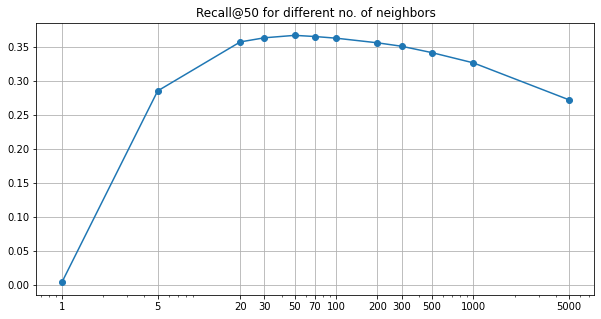

In [78]:
plot_metric("Recall@50")

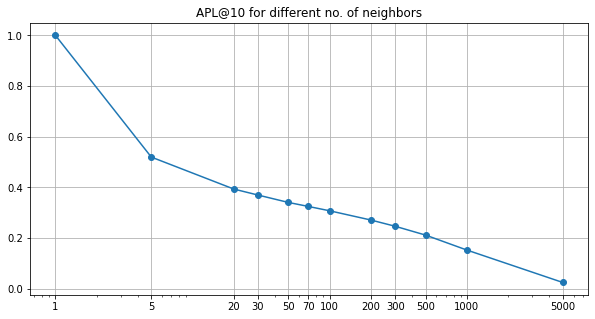

In [79]:
plot_metric("APL@10")

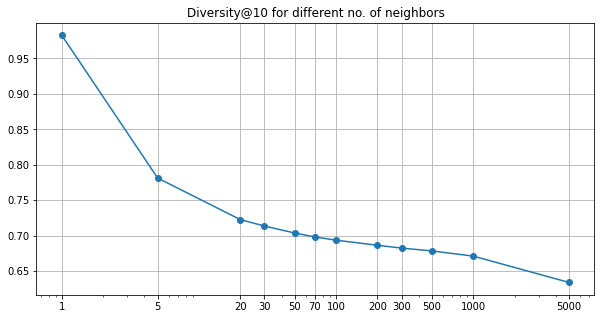

In [80]:
plot_metric("Diversity@10")

In [91]:
results_output = {}
for k in x:
    results_output[k] = data[k].drop("id").to_dict()

In [92]:
with open("./results/knn_eval.json", "w") as f:
    json.dump(results_output, f, indent=4)